<a href="https://colab.research.google.com/github/Teelakreiste/PhraseGeneticAlgorithm/blob/master/PhraseGeneticAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmo Genético - Evolución de Frases - Documentación

Este documento proporciona una explicación y documentación para el código del algoritmo genético utilizado para resolver una frase objetivo.

Este código implementa un Algoritmo Genético para evolucionar una población de individuos y lograr que coincidan con una frase objetivo. El algoritmo imita el proceso de selección natural y herencia genética para encontrar la mejor solución.

## Descripción del Problema

El objetivo del algoritmo es generar una frase objetivo dada, utilizando un enfoque de algoritmo genético. Se parte de una población inicial de individuos con genes aleatorios y, a través de selección, reproducción y mutación, se busca mejorar la aptitud de la población a lo largo de las generaciones hasta encontrar la frase objetivo.

## Descripción general del algoritmo

1. **Inicialización**: Se crea una población inicial de individuos con genes aleatorios.
2. **Cálculo de Aptitud**: Se calcula la aptitud de cada individuo comparando sus genes con la frase objetivo.
3. **Selección**: Se seleccionan los individuos para la reproducción basándose en su aptitud, utilizando un método de selección ponderado por probabilidad.
4. **Cruce**: Se crean descendientes realizando cruces entre pares de padres seleccionados, combinando sus genes para crear nuevos individuos.
5. **Mutación**: Se introducen cambios aleatorios (mutaciones) en los genes de los descendientes para mantener diversidad en la población.
6. **Evaluación de Aptitud**: Se calcula la aptitud de los nuevos individuos.
7. **Reemplazo**: Se reemplaza la antigua generación con la nueva generación de descendientes.
8. **Terminación**: Se repiten los pasos 3-7 hasta que se encuentre la frase objetivo o se cumpla una condición de terminación.
9. **Resultados**: Se muestra la mejor frase encontrada y el número de generaciones necesarias para alcanzarla.

## Clases

### `DNA`

Representa un individuo en la población.

#### Propiedades

- `target`: La frase objetivo a coincidir.
- `genes`: Los genes (caracteres) del individuo.
- `fitness`: El valor de aptitud del individuo.

#### Métodos

- `calculate_fitness()`: Calcula la aptitud del individuo basándose en el número de genes coincidentes con la frase objetivo.
- `crossover(partner)`: Realiza un cruce con otro individuo para crear un hijo con una combinación de genes de ambos padres.
- `mutate(mutation_rate)`: Realiza mutaciones aleatorias en los genes del individuo con una tasa de mutación dada.
- `get_phrase()`: Devuelve la representación en forma de cadena de los genes del individuo.

### `Population`

Representa una población de individuos.

#### Propiedades

- `target_phrase`: La frase objetivo a coincidir.
- `total_population`: El número total de individuos en la población.
- `mutation_rate`: La probabilidad de mutación para un individuo.
- `population`: Una lista de objetos `DNA` que representa la población.
- `generation`: El número de generación actual.
- `best_fitness`: La aptitud del mejor individuo.
- `best_phrase`: La mejor frase encontrada en la población.
- `average_fitness_history`: Una lista para almacenar la aptitud promedio a lo largo de las generaciones.
- `best_fitness_history`: Una lista para almacenar la mejor aptitud a lo largo de las generaciones.

#### Métodos

- `calculate_fitness()`: Calcula la aptitud de cada individuo en la población.
- `selection()`: Selecciona los individuos para la reproducción basándose en su aptitud.
- `reproduction(mating_pool)`: Realiza la reproducción y genera una nueva población a partir de una "piscina de apareamiento".
- `evolve()`: Ejecuta el proceso de evolución de la población hasta que se alcance la frase objetivo.
- `display_progress()`: Muestra información sobre la generación actual y el progreso de la evolución.
- `plot_fitness_progress()`: Muestra un gráfico del progreso del mejor fitness a lo largo de las generaciones.
- `calculate_average_fitness()`: Calcula la aptitud promedio de la población en la generación actual.
- `plot_average_fitness()`: Muestra un gráfico del progreso del aptitud promedio a lo largo de las generaciones.

## Uso

1. Definir los parámetros del algoritmo genético, como la frase objetivo, la tasa de mutación y el tamaño de la población.
2. Crear una instancia de la clase `Population`, pasando los parámetros definidos.
3. Llamar al método `evolve()` en la instancia de `Population` para comenzar la evolución.
4. El algoritmo se ejecutará hasta que se alcance la frase objetivo, mostrando información detallada sobre el progreso en cada generación.
5. Una vez finalizado el algoritmo, se imprimirá un mensaje indicando que el algoritmo ha finalizado.
6. Se mostrará la mejor frase encontrada y el número total de generaciones transcurridas.

```python
# Parámetros para el Algoritmo Genético
target_phrase = "BACK TO THE FUTURE"
mutation_rate = 0.01
total_population = 150

# Crear una instancia de la población y evolucionar
population = Population(target_phrase, total_population, mutation_rate)
population.evolve()

print("¡Algoritmo finalizado!")
print("Mejor frase encontrada:", population.best_phrase)
print("Generaciones totales:", population.generation)

# Mostrar el gráfico del progreso del mejor fitness y aptitud promedio
population.plot_fitness_progress()
population.plot_average_fitness()
```


¡Eso es todo! Ahora estás listo para utilizar el código del algoritmo genético para resolver una frase objetivo. ¡Diviértete y experimenta con diferentes frases y parámetros para obtener resultados interesantes! Si tienes alguna pregunta adicional, no dudes en consultar la documentación o realizar preguntas adicionales. ¡Buena suerte!


In [1]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class DNA:
    def __init__(self, target):
        self.target = target
        self.genes = [chr(random.randint(32, 127)) for _ in range(len(target))] # Genera genes aleatorios
        self.fitness = 0.0
        self.fitness = 0.0

    def calculate_fitness(self):
        score = sum(1 for gene, target_gene in zip(self.genes, self.target) if gene == target_gene)
        self.fitness = score / len(self.target) # Calcula la aptitud del individuo

    def crossover(self, partner):
        child = DNA(self.target)
        midpoint = random.randint(0, len(self.genes))
        child.genes = self.genes[:midpoint] + partner.genes[midpoint:] # Combina los genes de dos padres
        return child

    def mutate(self, mutation_rate):
        for i in range(len(self.genes)):
            if random.random() < mutation_rate:
                self.genes[i] = chr(random.randint(32, 127)) # Realiza mutaciones en los genes con cierta probabilidad

    def get_phrase(self):
        return ''.join(self.genes) # Devuelve la representación de los genes como una cadena


In [3]:
class Population:
    def __init__(self, target_phrase, total_population, mutation_rate):
        self.target_phrase = target_phrase
        self.total_population = total_population
        self.mutation_rate = mutation_rate
        self.population = [DNA(target_phrase) for _ in range(total_population)] # Crea la población inicial
        self.generation = 0
        self.best_fitness = 0.0
        self.best_phrase = ""
        self.average_fitness_history = []
        self.best_fitness_history = []

    def calculate_fitness(self):
        for individual in self.population:
            individual.calculate_fitness() # Calcula la aptitud de cada individuo en la población

    def selection(self):
        mating_pool = []
        for individual in self.population:
            n = int(individual.fitness * 100)
            mating_pool.extend([individual] * n) # Crea una "piscina de apareamiento" ponderada por la aptitud
        return mating_pool

    def reproduction(self, mating_pool):
        new_population = []
        for _ in range(self.total_population):
            parent_a = random.choice(mating_pool)
            parent_b = random.choice(mating_pool)
            child = parent_a.crossover(parent_b) # Realiza cruces entre los individuos seleccionados
            child.mutate(self.mutation_rate) # Aplica mutaciones al hijo
            child.calculate_fitness() # Calcula la aptitud del hijo
            new_population.append(child) # Agrega el hijo a la nueva población
        self.population = new_population

    def evolve(self):
        while True:
            self.calculate_fitness()
            mating_pool = self.selection()
            self.reproduction(mating_pool)
            best_individual = max(self.population, key=lambda x: x.fitness)
            self.best_fitness = best_individual.fitness
            self.best_phrase = best_individual.get_phrase()
            self.generation += 1

            self.display_progress()

            if self.best_phrase == self.target_phrase:
                break

            self.average_fitness_history.append(self.calculate_average_fitness())
            self.best_fitness_history.append(self.best_fitness)

    def display_progress(self):
        print("Generation:", self.generation)
        print("Best phrase:", self.best_phrase)
        print("Best fitness:", self.best_fitness)
        average_fitness = sum(individual.fitness for individual in self.population) / self.total_population
        print("Average fitness:", average_fitness)
        print("---------------------------")

    def plot_fitness_progress(self):
        generations = list(range(self.generation-1))
        fitness_values = self.best_fitness_history[:self.generation]
        plt.title("Progress of Best Fitness")
        plt.plot(generations, fitness_values)
        plt.title("Progress of Best Fitness")
        plt.xlabel("Generation")
        plt.ylabel("Best Fitness")
        plt.show()

    def calculate_average_fitness(self):
        return sum(individual.fitness for individual in self.population) / self.total_population

    def plot_average_fitness(self):
        generations = list(range(self.generation - 1))
        plt.title("Progress of Average Fitness")
        plt.plot(generations, self.average_fitness_history)
        plt.title("Progress of Average Fitness")
        plt.xlabel("Generation")
        plt.ylabel("Average Fitness")
        plt.show()

In [9]:
# Parámetros del algoritmo genético
#@markdown Parámetros del algoritmo genético
target_phrase = "BACK TO THE FUTURE" #@param {type:"string"}
mutation_rate = 0.01 #@param {type:"number"}
total_population = 150 #@param {type:"number"}


In [10]:
# Crear una instancia de la población y evolucionar
population = Population(target_phrase, total_population, mutation_rate)
population.evolve()

print("Algorithm finished!")
print("Best phrase:", population.best_phrase)
print("Total generations:", population.generation)

Se han truncado las últimas 5000 líneas del flujo de salida.
Average fitness: 0.728518518518519
---------------------------
Generation: 775
Best phrase: BACK TD gAE FUTURE
Best fitness: 0.8333333333333334
Average fitness: 0.7274074074074078
---------------------------
Generation: 776
Best phrase: BACK TD grE FUTURE
Best fitness: 0.8333333333333334
Average fitness: 0.725555555555556
---------------------------
Generation: 777
Best phrase: BACK TD 2AE FUTURE
Best fitness: 0.8333333333333334
Average fitness: 0.7300000000000006
---------------------------
Generation: 778
Best phrase: BACK TD gAE FUTURE
Best fitness: 0.8333333333333334
Average fitness: 0.7277777777777782
---------------------------
Generation: 779
Best phrase: BACK TD 2AE FUTURE
Best fitness: 0.8333333333333334
Average fitness: 0.7137037037037045
---------------------------
Generation: 780
Best phrase: BACK TD SAE FUTURE
Best fitness: 0.8333333333333334
Average fitness: 0.7118518518518531
---------------------------
Generat

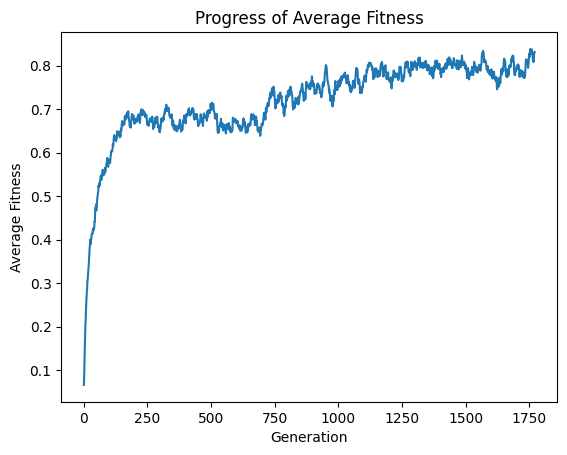

In [11]:
# Mostrar el gráfico del progreso del average fitness
population.plot_average_fitness()

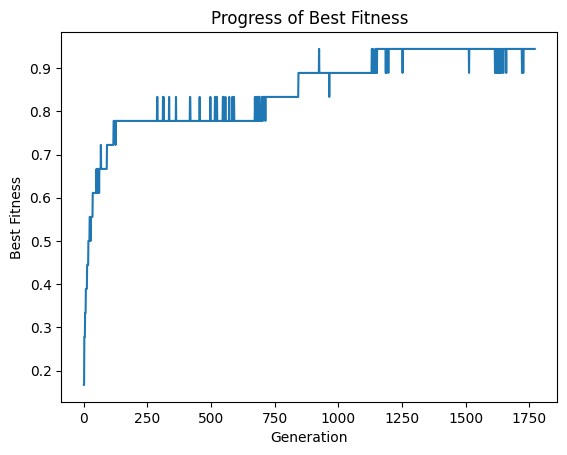

In [12]:
# Mostrar el gráfico del progreso del best fitness
population.plot_fitness_progress()

# Conclusiones
- El Algoritmo Genético es una poderosa técnica de optimización que puede utilizarse para resolver una amplia variedad de problemas. En este código, se aplicó para evolucionar una población y lograr que coincida con una frase objetivo. Mediante la selección de los individuos más aptos, el cruce y la mutación, el algoritmo converge gradualmente hacia la frase deseada.